<a href="https://colab.research.google.com/github/savindu29/Save-hearts/blob/feat%2Fsavindu/lstm_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [67]:

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/data/data.csv')

In [68]:
# Convert date column to datetime format and set it as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


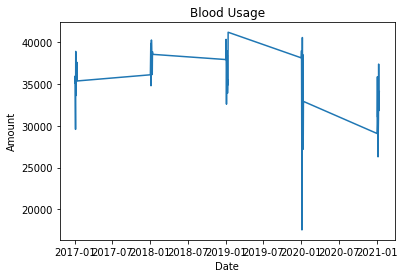

In [69]:
# Plot the data
plt.plot(data)
plt.title('Blood Usage')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()

In [70]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [71]:
# Split the data into training and testing sets
train_size = int(len(data_scaled) * 0.75)
test_size = len(data_scaled) - train_size
train_data = data_scaled[0:train_size, :]
test_data = data_scaled[train_size:len(data_scaled), :]

In [72]:
# Function to create dataset with look-back
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)


In [73]:
# Create the training and testing datasets with look-back
look_back = 3
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)


In [74]:
# Reshape the input data to be 3-dimensional
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [75]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [76]:
# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# Predict the blood usage for the testing set
predictions = model.predict(X_test)

Epoch 1/100
41/41 - 8s - loss: 0.2410 - 8s/epoch - 197ms/step
Epoch 2/100
41/41 - 0s - loss: 0.0396 - 188ms/epoch - 5ms/step
Epoch 3/100
41/41 - 0s - loss: 0.0358 - 213ms/epoch - 5ms/step
Epoch 4/100
41/41 - 0s - loss: 0.0387 - 207ms/epoch - 5ms/step
Epoch 5/100
41/41 - 0s - loss: 0.0388 - 189ms/epoch - 5ms/step
Epoch 6/100
41/41 - 0s - loss: 0.0391 - 194ms/epoch - 5ms/step
Epoch 7/100
41/41 - 0s - loss: 0.0355 - 189ms/epoch - 5ms/step
Epoch 8/100
41/41 - 0s - loss: 0.0380 - 221ms/epoch - 5ms/step
Epoch 9/100
41/41 - 0s - loss: 0.0353 - 204ms/epoch - 5ms/step
Epoch 10/100
41/41 - 0s - loss: 0.0382 - 194ms/epoch - 5ms/step
Epoch 11/100
41/41 - 0s - loss: 0.0361 - 177ms/epoch - 4ms/step
Epoch 12/100
41/41 - 0s - loss: 0.0349 - 179ms/epoch - 4ms/step
Epoch 13/100
41/41 - 0s - loss: 0.0344 - 197ms/epoch - 5ms/step
Epoch 14/100
41/41 - 0s - loss: 0.0361 - 212ms/epoch - 5ms/step
Epoch 15/100
41/41 - 0s - loss: 0.0362 - 200ms/epoch - 5ms/step
Epoch 16/100
41/41 - 0s - loss: 0.0319 - 212ms/epo

In [77]:
# Rescale the predictions and actual values
predictions = scaler.inverse_transform(predictions)
Y_test = scaler.inverse_transform([Y_test])


In [78]:
# Evaluate the model using root mean squared error
rmse = np.sqrt(np.mean((predictions - Y_test)**2))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 4549.881768748195


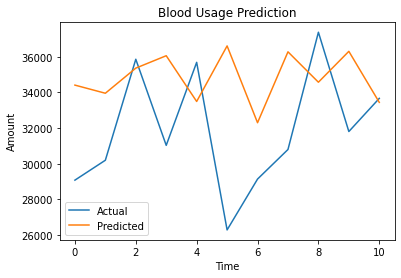

In [79]:
# Plot the predicted and actual blood usage for the testing set
plt.plot(Y_test.flatten(), label='Actual')
plt.plot(predictions.flatten(), label='Predicted')
plt.title('Blood Usage Prediction')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend()
plt.show()